In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

import json

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from sklearn import preprocessing

In [5]:
tweets = pd.read_csv('/code/src/distribuicoes/distribuitionRelated.csv')

lat = tweets['latitude'].values
long = tweets['longitude'].values

datesDistribuition = tweets.drop(columns=['latitude', 'longitude'])
datesDistribuition.describe()

16-06        22-06        29-06        06-07        13-07  \
count  3191.000000  3191.000000  3191.000000  3191.000000  3191.000000   
mean      0.139768     0.164839     0.171106     0.167972     0.122846   
std       0.449194     0.478796     0.550456     0.460328     0.439380   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       5.000000     5.000000     6.000000     3.000000     5.000000   

             20-07        10-08        18-08        24-08        01-09  \
count  3191.000000  3191.000000  3191.000000  3191.000000  3191.000000   
mean      0.132874     0.113757     0.107176     0.099342     0.097148   
std       0.412068     0.388594     0.353817     0.360906     0.325453   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       4.000000     6.000000     3.000000     7.000000     4.000000   

             07-09        15-09        21-09  
count  3191.000000  3191.000000  3191.000000  
mean      0.066123     0.043560     0.036352  
std       0.278289     0.214626     0.207827  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       3.000000     2.000000     3.000000

In [6]:
labels = []

for column in tweets:
    values = tweets[column].values
    count = 0
    for label in values:
        try:
            labels[count] = labels[count] + column+ ":" +str(label) + "\n"
        except:
            labels.append(column+ ":"+str(label)+"\n")
        labels[count] = labels[count].replace("-", "/")
        count += 1

In [7]:
mapa = folium.Map(location=[-23.5489,-46.6388],zoom_start=10)

for la,lo,label in zip(lat,long,labels):
    folium.Circle([la, lo], 1000, fill=True, popup=label).add_to(mapa)

mapa

In [8]:
def getCoordinates(dataframe, column):
    coordinates = []

    for latitude, longitude, value in zip(dataframe.latitude, dataframe.longitude, dataframe[column]):
        if(value > 0):
            coordinates.append([latitude, longitude, value])
    
    return coordinates

In [9]:
def plotHeatMap(dataframe, column):
    mapa = folium.Map(location=[-23.5489,-46.6388],zoom_start=6)
    
    coordinates = getCoordinates(dataframe, column)
    
    HeatMap(coordinates).add_to(mapa)
    return mapa

In [10]:
plotHeatMap(tweets, '16-06')

In [11]:
plotHeatMap(tweets, '22-06')

In [12]:
plotHeatMap(tweets, '29-06')

In [13]:
plotHeatMap(tweets, '20-07')

In [14]:
plotHeatMap(tweets, '06-07')

In [15]:
plotHeatMap(tweets, '13-07')

In [16]:
plotHeatMap(tweets, '20-07')

In [17]:
def parseData(row):
    row['Data'] = row['Data'].replace(" ", "/")
    months = ['fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set']
    key = 2
    for month in months:
        row['Data'] = row['Data'].replace(month, "0"+str(key)+'/2020')
        key += 1
        
    return row['Data']

In [42]:
covid = pd.read_csv('/code/src/distribuicoes/covid-19-sp.csv')

#remover colunas unamed
covid.drop(covid.columns[covid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

covid['Data'] = covid.apply (lambda row: parseData(row), axis=1)

covid.head(10)

Data  casos  casosDia  obitos
0  26/02/2020      1         1     NaN
1  27/02/2020      0         0     NaN
2  28/02/2020      0         0     NaN
3  29/02/2020      2         1     NaN
4  01/03/2020      0         0     NaN
5  02/03/2020      0         0     NaN
6  03/03/2020      0         0     NaN
7  04/03/2020      3         1     NaN
8  05/03/2020      6         3     NaN
9  06/03/2020     10         4     NaN

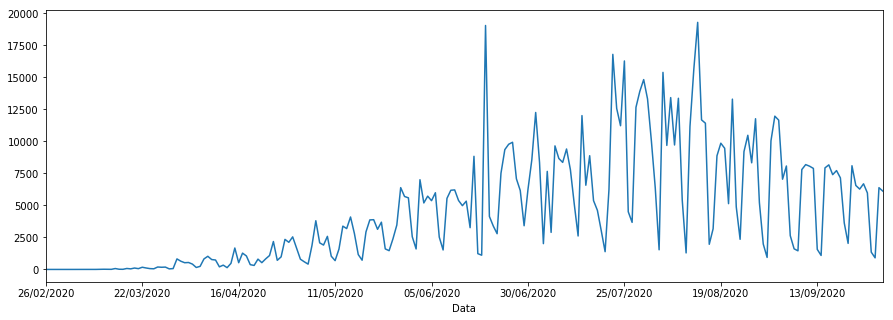

In [43]:
covid.groupby('Data', sort=False)['casosDia'].sum().plot(kind="line", figsize=(15, 5))
plt.show()

In [44]:
#def createCity(row):
#    try:
#        locator = Nominatim(user_agent="myGeocoder")
#        coordinates = str(row['latitude'])+', '+str(row['longitude'])
#        location = locator.reverse(coordinates)
#        result = location.raw
#        print(coordinates, result['address']['city'])
#        return result['address']['city']
#    except:
#        return "Indeterminado"

In [45]:
#Usa um serviço de reverse geolocation para buscar a cidade e agrupar dados, salvo num csv
#tweets['City'] = tweets.apply (lambda row: createCity(row), axis=1)
#tweets.to_csv('distribuitionWithCity.csv', index = False)

In [46]:
cities = pd.read_csv('distribuitionWithCity.csv')

def getCity(city):
    dataframe = cities[cities['City'] == city]
    
    dataframe = dataframe[['16-06', '22-06', '29-06', '06-07', '13-07', '20-07', '10-08', '18-08', '24-08', '01-09', '07-09', '15-09', '21-09']]    

    return dataframe.sum()

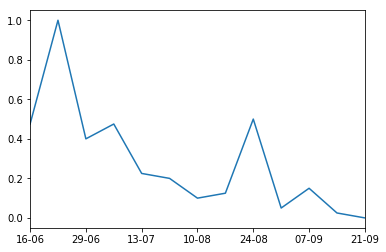

In [47]:
tweetsNormalizados = getCity("São Paulo")

#normaliza dados
tweetsNormalizados=(tweetsNormalizados-tweetsNormalizados.min())/(tweetsNormalizados.max()-tweetsNormalizados.min())

tweetsNormalizados.plot(kind="line")
plt.show()

In [48]:
def groupCovid(start, end):
    df = covid
    
    #agrupa casos por semana
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.sort_values(by="Data")
    df = df[(df['Data'] >= start) & (df['Data'] <= end)]
    
    groupedByWeek = df.groupby(df['Data'].dt.strftime('%W'))['casosDia']
    
    return groupedByWeek.sum()

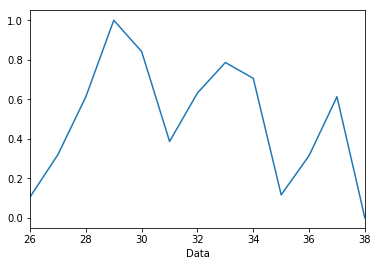

In [49]:
covidDataByWeek = groupCovid("2020-06-30", "2020-09-21")

#normaliza dados
covidDataByWeek=(covidDataByWeek-covidDataByWeek.min())/(covidDataByWeek.max()-covidDataByWeek.min())

covidDataByWeek.plot(kind="line")
plt.show()

In [65]:
dfTweets = pd.DataFrame({'data':tweetsNormalizados.index, 'tweets':tweetsNormalizados.values})
dfTweets["id"] = dfTweets.index + 1 #busca casos de 3 semanas seguintes

dfCasos = pd.DataFrame({'semana':covidDataByWeek.index, 'casosDia':covidDataByWeek.values})
dfCasos["id"] = dfCasos.index + 1

In [66]:
dadosAgrupados = pd.concat([dfTweets])
dadosAgrupados = pd.merge(dadosAgrupados, dfCasos, on='id')
dadosAgrupados = dadosAgrupados[['data', 'semana', 'tweets', 'casosDia']]
dadosAgrupados

data semana  tweets  casosDia
0   16-06     26   0.475  0.106157
1   22-06     27   1.000  0.320578
2   29-06     28   0.400  0.613145
3   06-07     29   0.475  1.000000
4   13-07     30   0.225  0.841393
5   20-07     31   0.200  0.386855
6   10-08     32   0.100  0.631979
7   18-08     33   0.125  0.786296
8   24-08     34   0.500  0.706163
9   01-09     35   0.050  0.116650
10  07-09     36   0.150  0.314988
11  15-09     37   0.025  0.613010
12  21-09     38   0.000  0.000000

In [63]:
dadosAgrupados.corr()

tweets  casosDia
tweets    1.000000  0.642314
casosDia  0.642314  1.000000

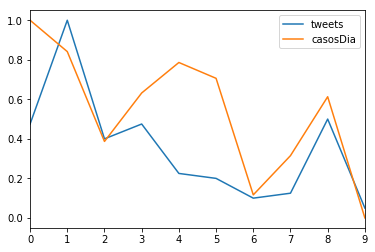

In [64]:
dadosAgrupados.plot(kind="line")
plt.show()